In [1]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import os
import numpy as np
import pandas as pd

In [2]:
SR = pd.read_csv('../data/MMM_Serial.csv', header=None)
PR = pd.read_csv('../data/MMM_Parallel.csv', header=None)
HR = pd.read_csv('../data/MMM_hybrid.csv', header=None)

SR.rename(columns={0: 'Threads', 1: 'Size', 2: 'Time'}, inplace=True)
PR.rename(columns={0: 'Threads', 1: 'Size', 2: 'Time'}, inplace=True)
HR.rename(columns={0: 'Size', 1: 'Tasks', 2: 'Threads', 3 :'Time'}, inplace=True)

serial_results_avg = SR.groupby(['Threads','Size'])['Time'].mean().reset_index()
openmp_results_avg = PR.groupby(['Threads','Size'])['Time'].mean().reset_index()
hybrid_results_avg = HR.groupby(['Size','Tasks','Threads'])['Time'].mean().reset_index()

In [3]:
def Mean(X):
    # This function calculates the mean of the 80% middle data.
    Start = int(len(X) * 0.1)
    End   = int(len(X) * 0.9)
    return np.mean(X[Start:End])

## Part 1: Q1: Serial run vs parallel with one thread.

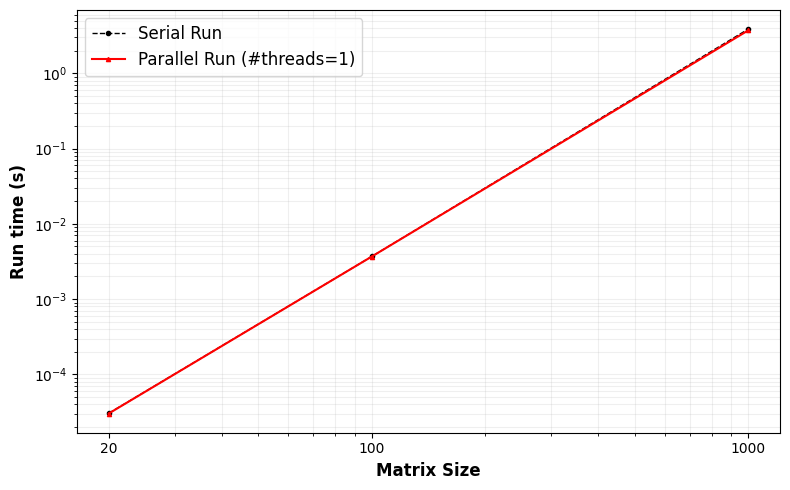

In [4]:
# Extract the data.
Sizes = SR.Size.unique()
Serial, Parallel = [], []
for ss in Sizes:
    Serial.append(Mean(SR[SR.Size == ss]['Time'].to_numpy()))
    Parallel.append(Mean(PR[(PR.Size == ss) & (PR.Threads == 1)]['Time'].to_numpy()))

fig = plt.figure(figsize=(8, 5))
plt.loglog(Sizes, Serial, ls='--', lw=1, color='k', marker='o', ms=3, label='Serial Run')
plt.loglog(Sizes, Parallel, ls='-', lw=1.5, color='r', marker='^', ms=3, label='Parallel Run (#threads=1)')

plt.xlabel('Matrix Size', fontsize=12, color='k', fontweight='bold')
plt.ylabel('Run time (s)', fontsize=12, color='k', fontweight='bold')
plt.legend(fontsize=12, fancybox=True)
plt.grid(which='both', alpha=0.2)
plt.xticks([20, 100, 1000])
plt.gca().set_xticklabels(['20', '100', '1000'])
fig.tight_layout()
fig.savefig('Fig01_Serial_Thread1.png', format='png', dpi=800)


### Part 2: Q2: Run time as a function of num threads. 

In [5]:
# Extract the results.
Threads = PR.Threads.unique()
Sizes = PR.Size.unique()

Res = np.zeros((len(Sizes), len(Threads)))

for i, ss in enumerate(Sizes):
    for j, tt in enumerate(Threads):
        Res[i, j] = Mean(PR[(PR.Size == ss) & (PR.Threads == tt)]['Time'].to_numpy())

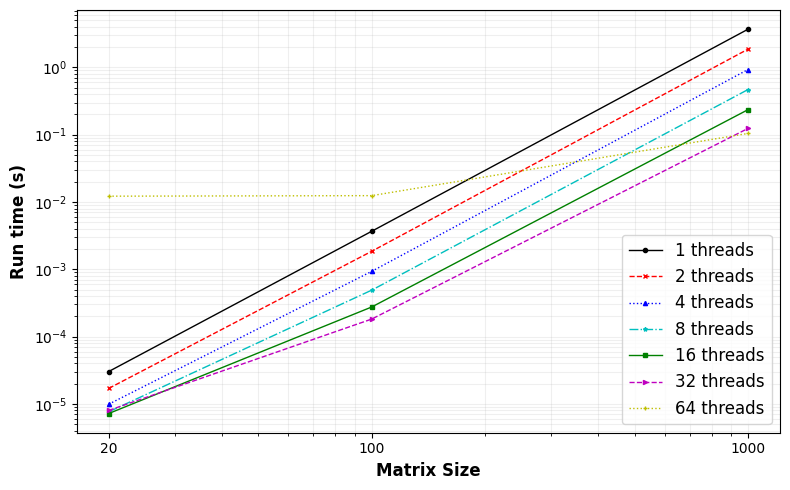

In [6]:
LS      = ['-', '--', ':', '-.', '-', '--', ':', '-.']
LW      = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Color   = ['k', 'r', 'b', 'c', 'g', 'm', 'y']
Marker  = ['o', 'x', '^', '*', 's', '>', '+']
MS      = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

fig = plt.figure(figsize=(8, 5))
for i in range(Res.shape[1]):
    plt.loglog(Sizes, Res[:, i], ls=LS[i], lw=LW[i], color=Color[i], 
               marker=Marker[i], ms=MS[i], label=f'{Threads[i]} threads')
plt.xlabel('Matrix Size', fontsize=12, color='k', fontweight='bold')
plt.ylabel('Run time (s)', fontsize=12, color='k', fontweight='bold')
plt.legend(fontsize=12, fancybox=True)
plt.grid(which='both', alpha=0.2)
plt.xticks([20, 100, 1000])
plt.gca().set_xticklabels(['20', '100', '1000'])
fig.tight_layout()
fig.savefig('Fig02_Parallel_Effect_Threads.png', format='png', dpi=800)

## Part 1: Q3: Scaling problem.


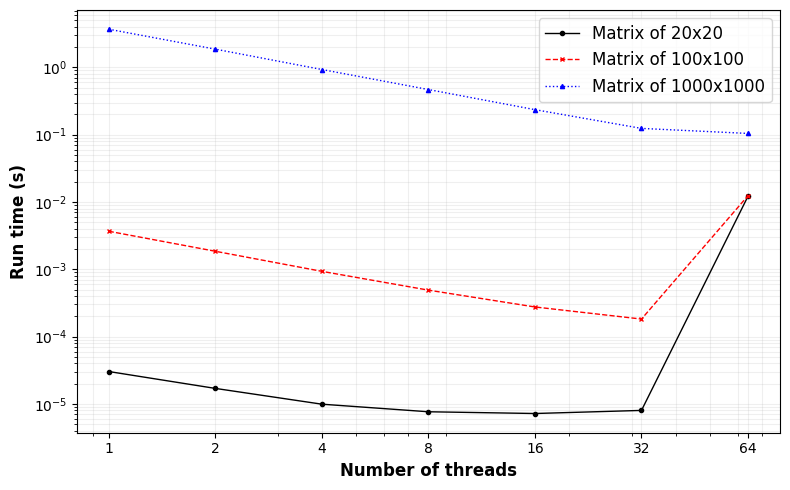

In [7]:
LS      = ['-', '--', ':', '-.', '-', '--', ':', '-.']
LW      = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Color   = ['k', 'r', 'b', 'c', 'g', 'm', 'y']
Marker  = ['o', 'x', '^', '*', 's', '>', '+']
MS      = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

fig = plt.figure(figsize=(8, 5))
for i in range(Res.shape[0]):
    plt.loglog(Threads, Res[i, :], ls=LS[i], lw=LW[i], color=Color[i], 
               marker=Marker[i], ms=MS[i], label=f'Matrix of {Sizes[i]}x{Sizes[i]}')
plt.xlabel('Number of threads', fontsize=12, color='k', fontweight='bold')
plt.ylabel('Run time (s)', fontsize=12, color='k', fontweight='bold')
plt.legend(fontsize=12, fancybox=True)
plt.grid(which='both', alpha=0.2)
plt.xticks([1, 2, 4, 8, 16, 32, 64])
plt.gca().set_xticklabels(['1', '2', '4', '8', '16', '32', '64'])
fig.tight_layout()
fig.savefig('Fig03_Parallel_Scaling.png', format='png', dpi=800)

# Part 3: Q1

In [13]:
# Extract the results.
Res = {'Size': [], 'Task': [], 'Task': [], 'Thread': [], 'Time': []}
Sizes = HR.Size.unique()
Threads = HR.Threads.unique()
for ss in Sizes:
    for tt in Threads:
        AvgTime = Mean(HR[(HR.Size == ss) & (HR.Threads == tt)]['Time'].to_numpy())
        Res['Size'].append(ss)
        Res['Task'].append(int(64 / tt))
        Res['Thread'].append(tt)
        Res['Time'].append(AvgTime)

Res = pd.DataFrame(Res)
Res.sort_values(by=['Task', 'Size'], ascending=[True, True], inplace=True)
Res

,Size,Task,Thread,Time
0,20,2,32,0.028725
6,100,2,32,0.032998
12,1000,2,32,0.363003
18,2000,2,32,3.046189
1,20,4,16,0.047534
7,100,4,16,0.045644
13,1000,4,16,0.281774
19,2000,4,16,2.071153
2,20,8,8,0.088207
8,100,8,8,0.089645


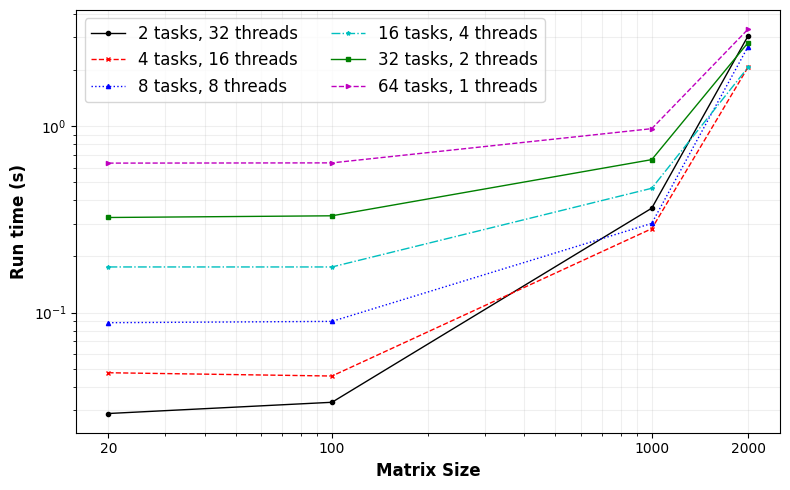

In [24]:
LS      = ['-', '--', ':', '-.', '-', '--', ':', '-.']
LW      = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Color   = ['k', 'r', 'b', 'c', 'g', 'm', 'y']
Marker  = ['o', 'x', '^', '*', 's', '>', '+']
MS      = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Threads = Res.Thread.unique()

fig = plt.figure(figsize=(8, 5))
for i in range(len(Threads)):
    tt = Threads[i]
    ta = int(64 / tt)
    df = Res[Res.Thread == tt]
    X  = list(df['Size'])
    Y  = list(df['Time'])
    plt.loglog(X, Y, ls=LS[i], lw=LW[i], color=Color[i], 
               marker=Marker[i], ms=MS[i], label=f'{ta} tasks, {tt} threads')
plt.xlabel('Matrix Size', fontsize=12, color='k', fontweight='bold')
plt.ylabel('Run time (s)', fontsize=12, color='k', fontweight='bold')
plt.legend(fontsize=12, fancybox=True, ncol=2)
plt.grid(which='both', alpha=0.2)
plt.xticks([20, 100, 1000, 2000])
plt.gca().set_xticklabels(['20', '100', '1000', '2000'])
fig.tight_layout()
fig.savefig('Fig04_Hybrid.png', format='png', dpi=800)

In [20]:
X

[5, 11, 17, 23]